In [1]:
import os
import sys
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(1, os.path.join(sys.path[0],"/home/tkurihana/scratch-midway2/data/MOD06/" ) )
from analysis_lib import cluster_plotting2, _cluster_plotting
from analysis_lib import _get_swath, _load_tif_data
from analysis_lib import _get_colors, _gen_patches

In [28]:
from sklearn.metrics import silhouette_score as sil

In [29]:
import tensorflow as tf

### Data Directory

In [3]:
datadir = '/home/tkurihana/scratch-midway2/anl'

In [4]:
tifdir='/home/tkurihana/scratch-midway2/data/GEE/clouds_gee_2015_2016'

In [5]:
tifname='2015-06-28_MOD09GA_background_removal_zero_inputated_image_with_cf_10perc_grid_size10-0000017664-0000070656.tif'

### Load Swath

In [6]:
swath1 = _get_swath(tifdir, tifname)

 Shape  (9054, 9496, 7)


In [7]:
SHAPE = 128, 128, 7

In [8]:
patches = _gen_patches(swath1, normalization=True)

### N_cluster = 3

In [38]:
n_cluster = 3
colors = _get_colors(n=n_cluster)

In [ ]:
knn_label = np.load(datadir+'/'+'knn_label_spark_3.0-nc'+str(n_cluster)+'.npy')
_cluster_plotting(swath1, patches, knn_label, SHAPE, colors, ncluster=n_cluster)

### N_cluster = 4

In [18]:
n_cluster = 4
colors = _get_colors(n=n_cluster)

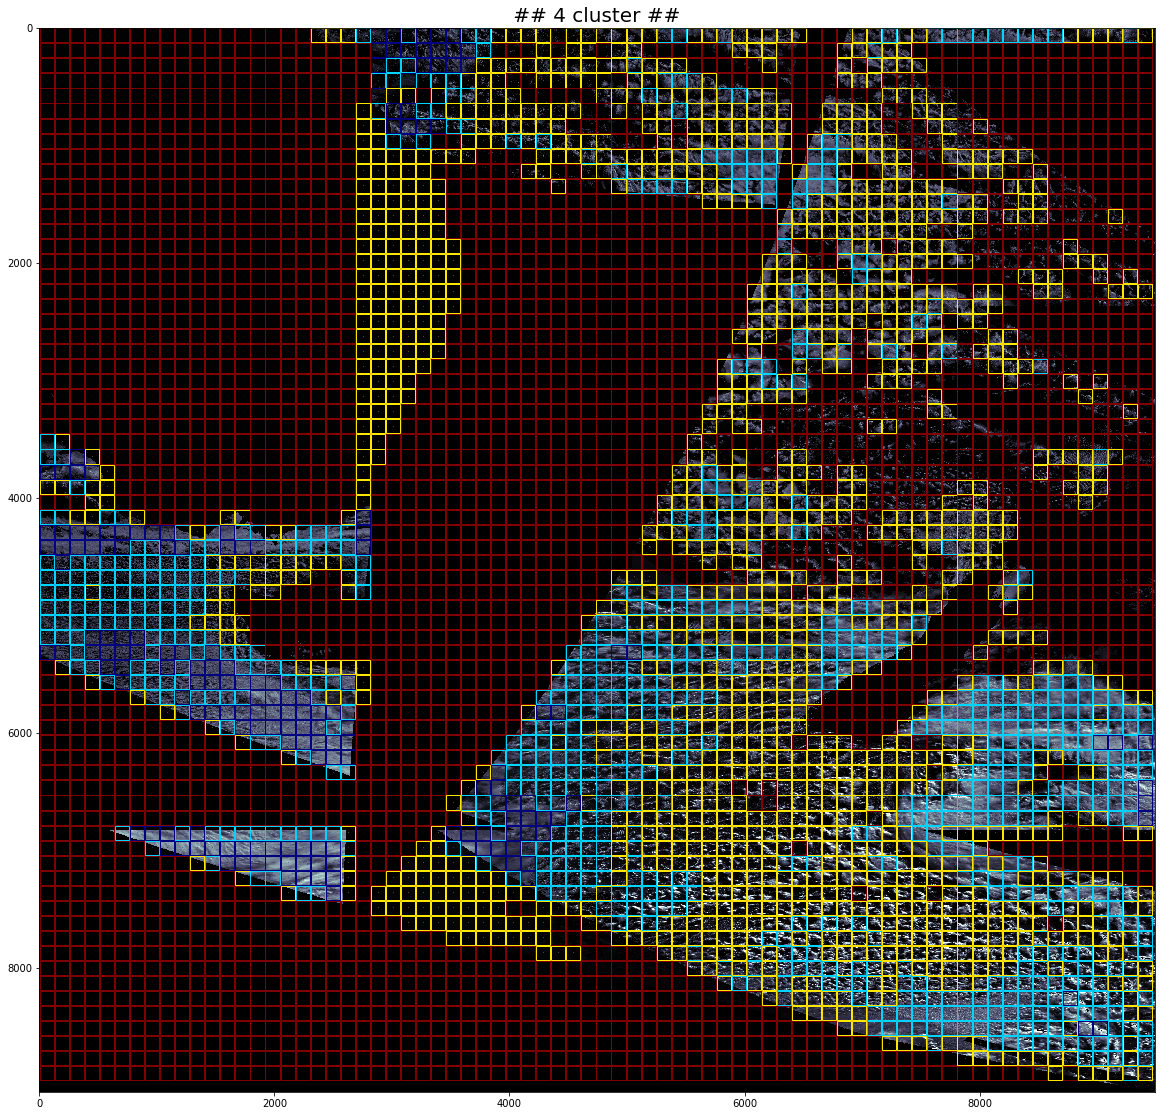

In [21]:
knn_label = np.load(datadir+'/'+'knn_label_spark_3.0-nc'+str(n_cluster)+'.npy')
_cluster_plotting(swath1, patches, knn_label, SHAPE, colors, ncluster=n_cluster)

### N_cluster = 6

In [22]:
n_cluster = 6
colors = _get_colors(n=n_cluster)

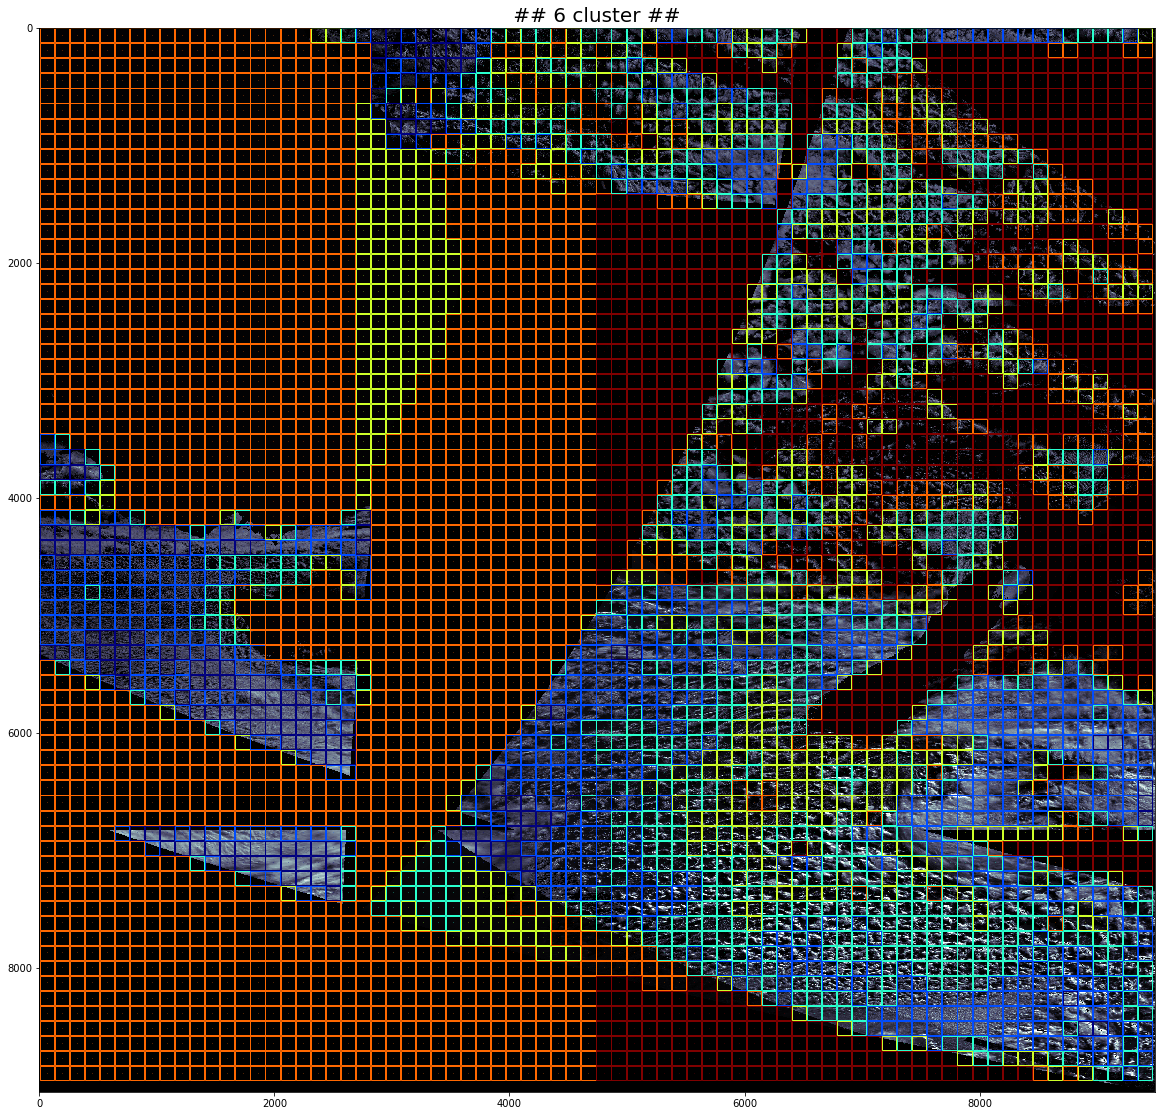

In [23]:
knn_label = np.load(datadir+'/'+'knn_label_spark_3.0-nc'+str(n_cluster)+'.npy')
_cluster_plotting(swath1, patches, knn_label, SHAPE, colors, ncluster=n_cluster)

### N_cluster = 8

In [24]:
n_cluster = 8
colors = _get_colors(n=n_cluster)

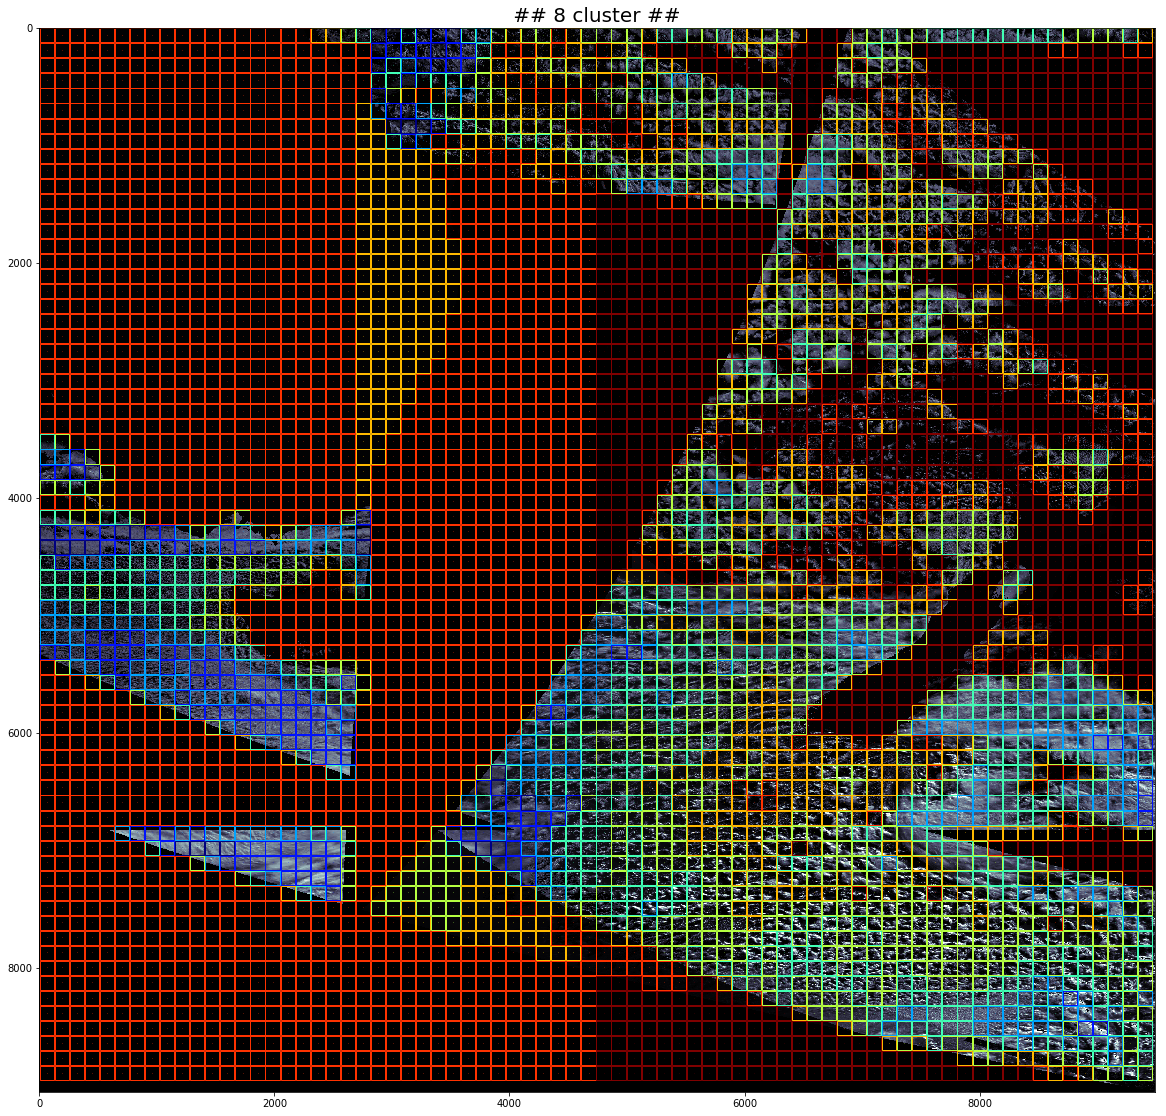

In [25]:
knn_label = np.load(datadir+'/'+'knn_label_spark_3.0-nc'+str(n_cluster)+'.npy')
_cluster_plotting(swath1, patches, knn_label, SHAPE, colors, ncluster=n_cluster)

### N_cluster = 10

In [26]:
n_cluster = 10
colors = _get_colors(n=n_cluster)

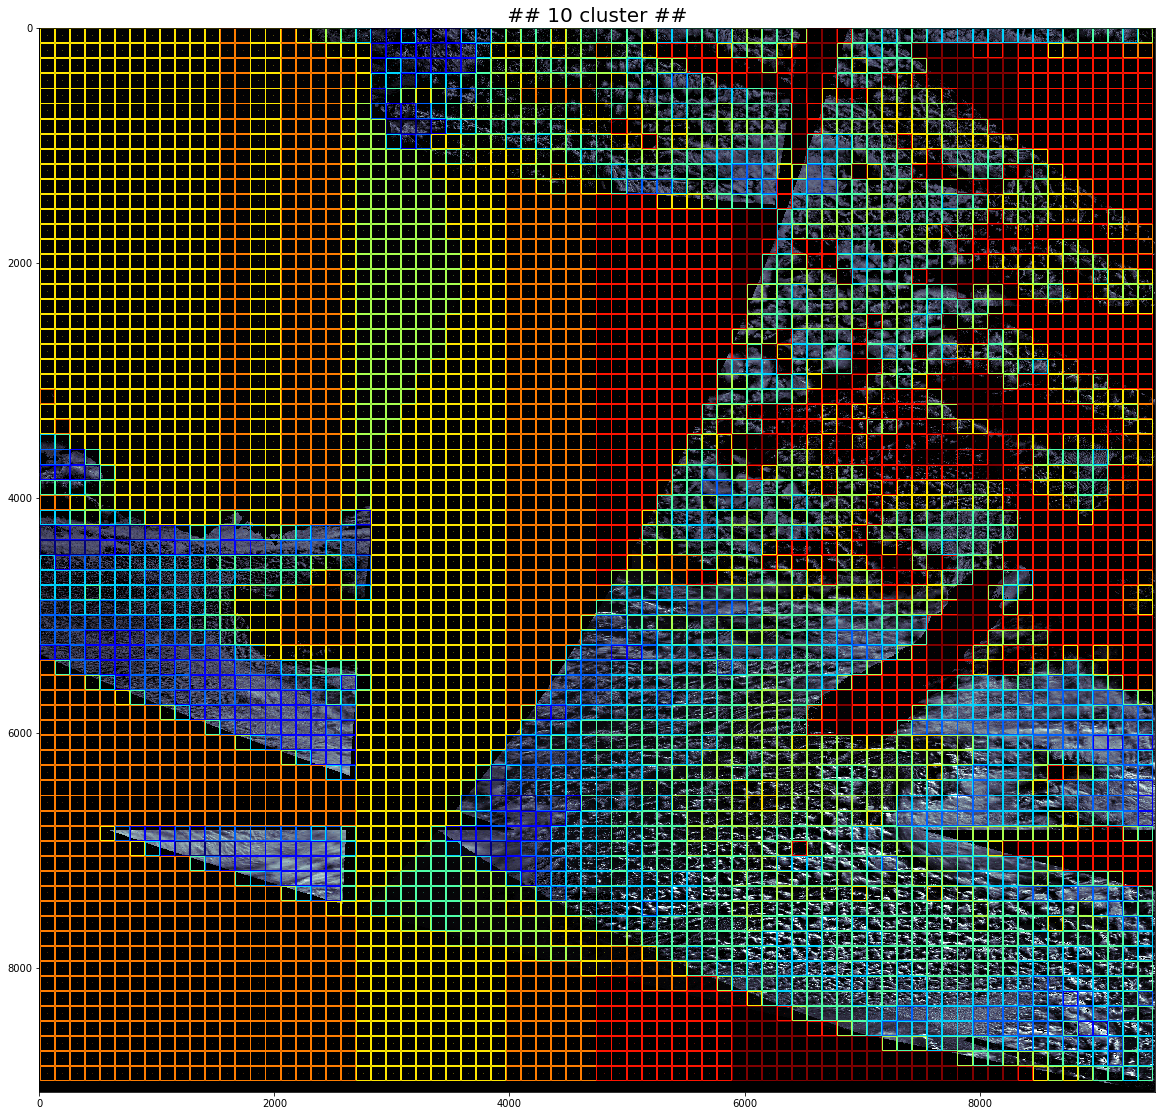

In [27]:
knn_label = np.load(datadir+'/'+'knn_label_spark_3.0-nc'+str(n_cluster)+'.npy')
_cluster_plotting(swath1, patches, knn_label, SHAPE, colors, ncluster=n_cluster)

### Sil Score for Different N_clusters

#### model load

In [30]:
# encoder part
model_dir='/home/tkurihana/clouds/output/m9-22_oceans/'
ENCODER_DEF=model_dir+'encoder.json'
ENCODER_WEIGHTS=model_dir+'encoder.h5'
with open(ENCODER_DEF,"r") as f:
    encoder = tf.keras.models.model_from_json(f.read())
encoder.load_weights(ENCODER_WEIGHTS)

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/tensorflow/python/keras/layers/core.py:791: UserWarning: models is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


In [31]:
patches = _gen_patches(swath1, normalization=True)
encs = encoder.predict( patches.reshape((-1,128,128,7)) )
encs_mean = encs.mean(axis=(1,2))

### N = 4

In [32]:
n_cluster = 4
knn_label = np.load(datadir+'/'+'knn_label_spark_3.0-nc'+str(n_cluster)+'.npy')

In [35]:
sil(encs_mean, labels=knn_label.flatten(), metric='euclidean')

0.46481052

### N = 6

In [36]:
n_cluster = 6
knn_label = np.load(datadir+'/'+'knn_label_spark_3.0-nc'+str(n_cluster)+'.npy')

In [37]:
sil(encs_mean, labels=knn_label.flatten(), metric='euclidean')

0.001248845